In [1]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
cmap = colors.LinearSegmentedColormap(
    'red_blue_classes',
    {'red': [(0, 1, 1), (1, 0.7, 0.7)],
     'green': [(0, 0.7, 0.7), (1, 0.7, 0.7)],
     'blue': [(0, 0.7, 0.7), (1, 1, 1)]})
plt.cm.register_cmap(cmap=cmap)

In [3]:
iris_data = load_iris()

In [4]:
print(iris_data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [5]:
data = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
data_class = iris_data.target
data[['sepal length (cm)', 'sepal width (cm)']]

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


In [7]:
data_class

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, data_class, test_size=0.25)
len(y_test)

38

In [9]:
lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)

LinearDiscriminantAnalysis()

In [10]:
lda.predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 2, 1, 0, 0, 1, 2, 0, 0, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 2, 1, 1, 0, 1, 1, 2, 0, 1, 0])

In [11]:
result = pd.DataFrame([y_test, lda.predict(X_test)]).T
result

,0,1
0,2,1
1,1,1
2,1,1
3,1,1
4,1,1
5,0,0
6,1,1
7,0,0
8,0,0
9,1,1


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, lda.predict(X_test))

0.9736842105263158

In [13]:
lda.coef_

array([[  6.06322546,   9.56317193, -16.26340967, -17.32964422],
       [ -1.47528363,  -4.48085131,   5.10346865,   2.11563304],
       [ -4.95555627,  -5.72035293,  12.17697583,  16.20792798]])

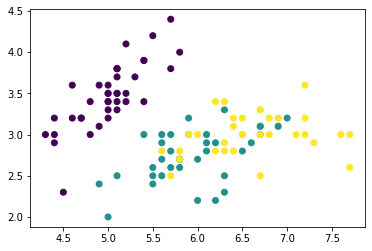

In [14]:
plt.scatter(x=X_train['sepal length (cm)'], y=X_train['sepal width (cm)'], c=y_train)
plt.show()

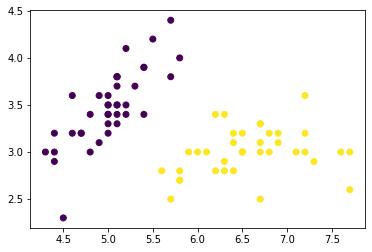

In [15]:
small_train = X_train[(y_train == 0) | (y_train == 2)]
small_train = small_train[['sepal length (cm)', 'sepal width (cm)']]
sy_train = y_train[(y_train == 0) | (y_train == 2)]
small_test = X_test[(y_test == 0) | (y_test == 2)]
small_test = small_test[['sepal length (cm)', 'sepal width (cm)']]
sy_test = y_test[(y_test == 0) | (y_test == 2)]
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.show()

In [16]:
lda_small = LinearDiscriminantAnalysis()
lda_small.fit(small_train, sy_train)

LinearDiscriminantAnalysis()

In [17]:
lda_small.means_

array([[5.01538462, 3.47948718],
       [6.57027027, 3.0027027 ]])

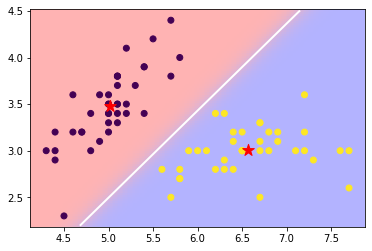

In [18]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)
plt.scatter(lda_small.means_[:, 0], lda_small.means_[:, 1], c='r', s=150, marker='*')

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))

Z = lda_small.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)

plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')

plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

In [19]:
lda_small.coef_

array([[ 11.31285715, -12.1066846 ]])

In [20]:
accuracy_score(sy_test, lda_small.predict(small_test))

0.9583333333333334

In [21]:
data[['sepal length (cm)', 'sepal width (cm)']].corr()

,sepal length (cm),sepal width (cm)
sepal length (cm),1.00000,-0.11757
sepal width (cm),-0.11757,1.00000


In [22]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(small_train, sy_train)

LogisticRegression()

In [23]:
lr.predict(small_test)

array([2, 0, 0, 0, 2, 0, 0, 2, 0, 0, 2, 0, 2, 2, 2, 2, 2, 2, 0, 2, 0, 2,
       0, 0])

In [24]:
lr.predict_proba(small_test)

array([[0.05482814, 0.94517186],
       [0.84587203, 0.15412797],
       [0.85799226, 0.14200774],
       [0.90986446, 0.09013554],
       [0.04201818, 0.95798182],
       [0.75367764, 0.24632236],
       [0.95535602, 0.04464398],
       [0.00357256, 0.99642744],
       [0.88155963, 0.11844037],
       [0.92412969, 0.07587031],
       [0.05026469, 0.94973531],
       [0.74422659, 0.25577341],
       [0.08313627, 0.91686373],
       [0.00100682, 0.99899318],
       [0.019863  , 0.980137  ],
       [0.00250774, 0.99749226],
       [0.00655144, 0.99344856],
       [0.05614536, 0.94385464],
       [0.95727159, 0.04272841],
       [0.15512558, 0.84487442],
       [0.77472319, 0.22527681],
       [0.03925162, 0.96074838],
       [0.97522325, 0.02477675],
       [0.89981123, 0.10018877]])

In [25]:
accuracy_score(sy_test, lr.predict(small_test))

0.9583333333333334

In [26]:
lr.coef_

array([[ 3.04698113, -1.87845868]])

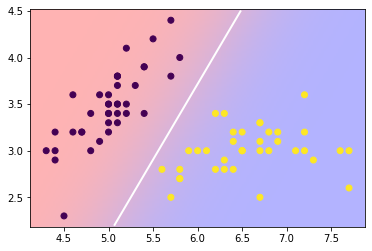

In [27]:
plt.scatter(small_train['sepal length (cm)'], small_train['sepal width (cm)'], c=sy_train)

nx, ny = 200, 100
x_min, x_max = plt.xlim()
y_min, y_max = plt.ylim()
xx, yy = np.meshgrid(np.linspace(x_min, x_max, nx),
                         np.linspace(y_min, y_max, ny))
Z = lr.predict_proba(np.c_[xx.ravel(), yy.ravel()])
Z = Z[:, 1].reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap='red_blue_classes',
                   norm=colors.Normalize(0., 1.), zorder=-1, shading='auto')
plt.contour(xx, yy, Z, [0.5], linewidths=2., colors='white')

plt.show()

In [29]:
X = data['sepal length (cm)']
y = data['sepal width (cm)']
X

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal length (cm), Length: 150, dtype: float64

The history saving thread hit an unexpected error (OperationalError('database is locked')).History will not be written to the database.


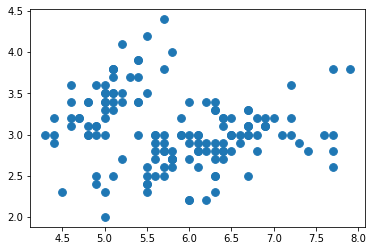

In [30]:
plt.scatter(X, y, cmap='autumn', s=60)

In [31]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [32]:
print(X.max())
print(X.min())

print(y.max())
print(y.min())

7.9
4.3
4.4
2.0


In [33]:
type(X)

pandas.core.series.Series

In [34]:
X_scaled = scaler.fit_transform(X.values.reshape(-1, 1))
X_scaled
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))
y_scaled

array([[ 1.01900435],
       [-0.13197948],
       [ 0.32841405],
       [ 0.09821729],
       [ 1.24920112],
       [ 1.93979142],
       [ 0.78880759],
       [ 0.78880759],
       [-0.36217625],
       [ 0.09821729],
       [ 1.47939788],
       [ 0.78880759],
       [-0.13197948],
       [-0.13197948],
       [ 2.16998818],
       [ 3.09077525],
       [ 1.93979142],
       [ 1.01900435],
       [ 1.70959465],
       [ 1.70959465],
       [ 0.78880759],
       [ 1.47939788],
       [ 1.24920112],
       [ 0.55861082],
       [ 0.78880759],
       [-0.13197948],
       [ 0.78880759],
       [ 1.01900435],
       [ 0.78880759],
       [ 0.32841405],
       [ 0.09821729],
       [ 0.78880759],
       [ 2.40018495],
       [ 2.63038172],
       [ 0.09821729],
       [ 0.32841405],
       [ 1.01900435],
       [ 1.24920112],
       [-0.13197948],
       [ 0.78880759],
       [ 1.01900435],
       [-1.74335684],
       [ 0.32841405],
       [ 1.01900435],
       [ 1.70959465],
       [-0

In [35]:
print(X_scaled.max())
print(X_scaled.min())

print(y_scaled.max())
print(y_scaled.min())

2.4920192021244283
-1.870024133847019
3.090775248299425
-2.433947141908088


In [36]:
X_scaled = scaler.fit_transform(data[['sepal length (cm)', 'sepal width (cm)']])
X_scaled

array([[-0.90068117,  1.01900435],
       [-1.14301691, -0.13197948],
       [-1.38535265,  0.32841405],
       [-1.50652052,  0.09821729],
       [-1.02184904,  1.24920112],
       [-0.53717756,  1.93979142],
       [-1.50652052,  0.78880759],
       [-1.02184904,  0.78880759],
       [-1.74885626, -0.36217625],
       [-1.14301691,  0.09821729],
       [-0.53717756,  1.47939788],
       [-1.26418478,  0.78880759],
       [-1.26418478, -0.13197948],
       [-1.87002413, -0.13197948],
       [-0.05250608,  2.16998818],
       [-0.17367395,  3.09077525],
       [-0.53717756,  1.93979142],
       [-0.90068117,  1.01900435],
       [-0.17367395,  1.70959465],
       [-0.90068117,  1.70959465],
       [-0.53717756,  0.78880759],
       [-0.90068117,  1.47939788],
       [-1.50652052,  1.24920112],
       [-0.90068117,  0.55861082],
       [-1.26418478,  0.78880759],
       [-1.02184904, -0.13197948],
       [-1.02184904,  0.78880759],
       [-0.7795133 ,  1.01900435],
       [-0.7795133 ,

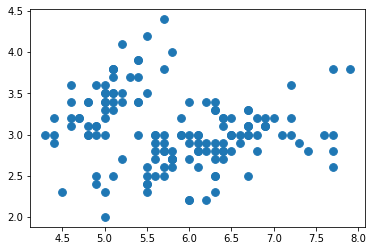

In [37]:
plt.scatter(X, y,cmap='autumn', s=60)

In [38]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=2)
clusters = kmeans.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

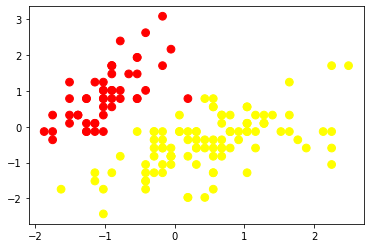

In [39]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], cmap='autumn', c=clusters, s=60)

In [40]:
k_inertia = []
ks = range(2, 20)

for k in ks:
    clf_kmeans = KMeans(n_clusters=k)
    clusters_kmeans = clf_kmeans.fit_predict(X_scaled)
    k_inertia.append(clf_kmeans.inertia_)

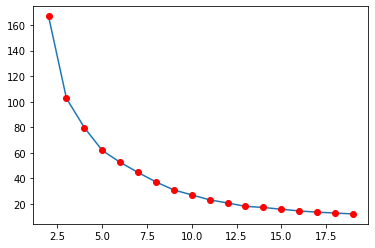

In [41]:
plt.plot(ks, k_inertia)
plt.plot(ks, k_inertia ,'ro')

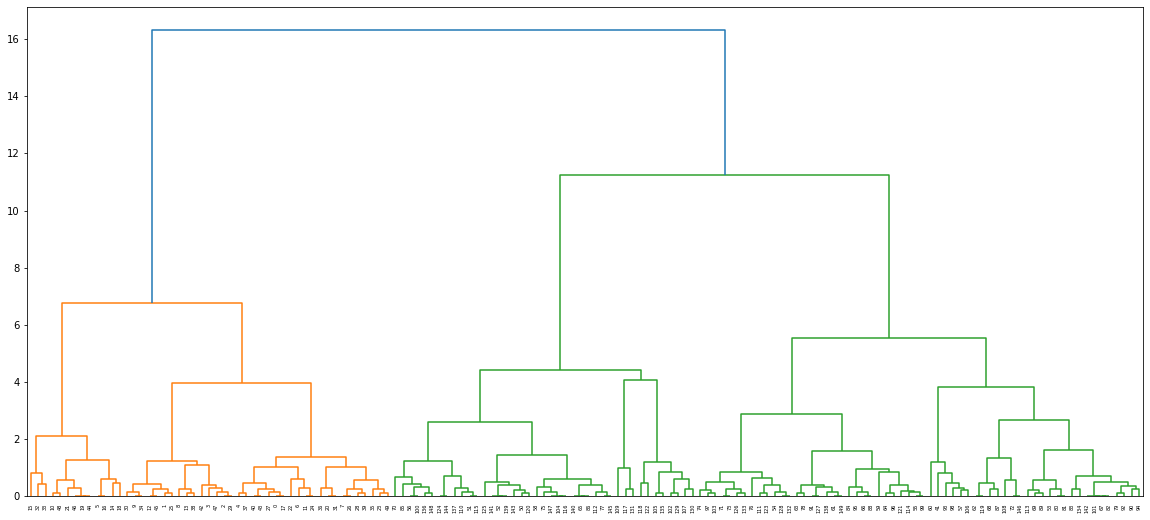

In [42]:
from scipy.spatial.distance import pdist
from scipy.cluster import hierarchy
distance_mat = pdist(X_scaled) 
Z = hierarchy.linkage(distance_mat, 'ward')
plt.figure(figsize=(20, 9))
dn = hierarchy.dendrogram(Z)

In [43]:
from sklearn.cluster import AgglomerativeClustering
aglo = AgglomerativeClustering(n_clusters=3)
clusters = aglo.fit_predict(X_scaled)
clusters

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 2, 1, 2, 1, 2,
       2, 1, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 1, 2, 2, 2,
       1, 1, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int64)

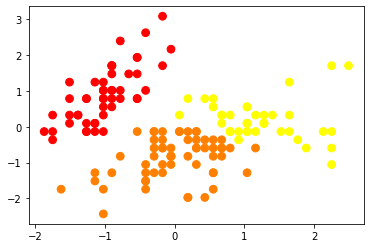

In [44]:
plt.scatter(X_scaled[:, 0], X_scaled[:, 1],cmap='autumn', c=clusters, s=60)

In [45]:
df = pd.DataFrame(data[['sepal length (cm)', 'sepal width (cm)']])
df['y_hat'] = clusters
df

,sepal length (cm),sepal width (cm),y_hat
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,2
146,6.3,2.5,1
147,6.5,3.0,2
148,6.2,3.4,2


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   y_hat              150 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 3.6 KB


In [47]:
df.describe()

,sepal length (cm),sepal width (cm),y_hat
count,150.000000,150.000000,150.000000
mean,5.843333,3.057333,0.946667
std,0.828066,0.435866,0.775347
min,4.300000,2.000000,0.000000
25%,5.100000,2.800000,0.000000
50%,5.800000,3.000000,1.000000
75%,6.400000,3.300000,2.000000
max,7.900000,4.400000,2.000000
